<a href="https://colab.research.google.com/github/Monalika-P/Self-Driving-Car/blob/master/Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
image = mpimg.imread('/content/drive/My Drive/Self_Driving_Car/exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


In [4]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

In [5]:
low_threshold = 5
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [6]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255   


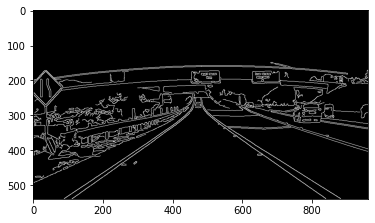

In [7]:
plt.imshow(edges, cmap='Greys_r')

In [8]:
 #Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [9]:
rho = 2
theta = np.pi/180
threshold = 15
min_line_length = 5
max_line_gap = 2
line_image = np.copy(image)*0
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


In [10]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [11]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)


In [12]:
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 


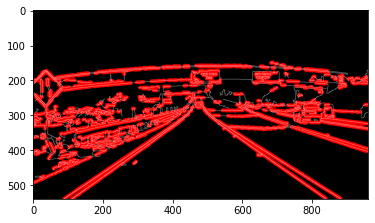

In [13]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)